In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

# example of reading and displaying image in grayscale

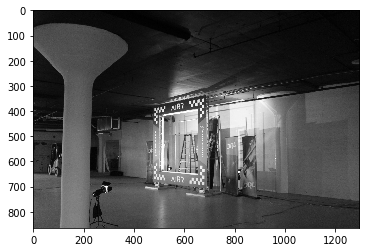

In [2]:
oneImage = cv2.imread("Data_training/IMG_5270.JPG",0)
plt.imshow(oneImage,cmap="gray")

In [3]:
oneImage.shape # shape of all images

(864, 1296)

# Read in Training Data

In [4]:
# if data not saved
import os

number_of_training_examples = len(os.listdir("Data_Training/"))
X = np.zeros((number_of_training_examples - 5,864,1296)) # pre allocate array for speed

file_list_sorted = os.listdir("Data_Training/")
file_list_sorted.sort()

index = 0
count = 0
for file in file_list_sorted:
    if(count != 445 and count != 2039 and count != 5302 and count != 5461 and count != 5757): # skip over pictures with no gate
        current_image = cv2.imread("Data_Training/"+file, 0) # images read in as grayscale
        X[index] = current_image
        index += 1
    count += 1

In [5]:
#np.save("X_data",X)   takes up over 30gb of space..

In [6]:
# load data instead of reading it in every time
# X = np.load("X_data.npy")

In [7]:
y = pd.read_json("training_data.json") # y is the training answers

In [8]:
y.keys()

Index(['IMG_8378.JPG', 'IMG_3034.JPG', 'IMG_2082.JPG', 'IMG_7209 (1).JPG',
       'IMG_5207.JPG', 'IMG_7597 (1).JPG', 'IMG_9253.JPG', 'IMG_6702.JPG',
       'IMG_6131.JPG', 'IMG_5979.JPG',
       ...
       'IMG_7557.JPG', 'IMG_6905.JPG', 'IMG_7025.JPG', 'IMG_0368.JPG',
       'IMG_5881.JPG', 'IMG_6291.JPG', 'IMG_0064.JPG', 'IMG_7112.JPG',
       'IMG_6098.JPG', 'IMG_3779.JPG'],
      dtype='object', length=9339)

In [9]:
X.shape

(9334, 864, 1296)

In [10]:
y.shape

(1, 9339)

In [11]:
# find pictures with no gates and remove them from y
to_remove = []
count = 0
for example in y.keys():
    if(len(y[example][0]) == 0):
        y = y.T
        y = y.drop(example)
        y = y.T
    count += 1  

In [12]:
y.shape

(1, 9334)

In [13]:
# sort the dataset by names
y = y.sort_index()
y.tail()

,IMG_8378.JPG,IMG_3034.JPG,IMG_2082.JPG,IMG_7209 (1).JPG,IMG_5207.JPG,IMG_7597 (1).JPG,IMG_9253.JPG,IMG_6702.JPG,IMG_6131.JPG,IMG_5979.JPG,...,IMG_7557.JPG,IMG_6905.JPG,IMG_7025.JPG,IMG_0368.JPG,IMG_5881.JPG,IMG_6291.JPG,IMG_0064.JPG,IMG_7112.JPG,IMG_6098.JPG,IMG_3779.JPG
0,"[616, 278, 948, 290, 945, 616, 609, 627]","[502, 255, 663, 373, 673, 696, 492, 677]","[504, 165, 829, 224, 819, 580, 489, 590]","[409, 285, 774, 292, 781, 642, 387, 646]","[494, 311, 765, 267, 768, 663, 495, 644]","[616, 432, 706, 480, 705, 696, 616, 699]","[212, 274, 533, 278, 533, 604, 210, 601]","[606, 400, 720, 369, 724, 611, 601, 609]","[509, 257, 599, 338, 597, 653, 504, 670]","[409, 309, 561, 271, 563, 539, 416, 527]",...,"[508, 254, 933, 193, 950, 696, 497, 672]","[470, 326, 748, 248, 775, 608, 476, 613]","[559, 336, 699, 361, 687, 528, 552, 528]","[665, 380, 870, 381, 867, 585, 661, 584]","[437, 248, 751, 203, 741, 571, 432, 565]","[599, 464, 755, 475, 753, 644, 597, 649]","[471, 400, 651, 406, 649, 584, 468, 585]","[461, 245, 820, 191, 839, 604, 457, 604]","[407, 228, 552, 136, 563, 611, 407, 571]","[461, 281, 675, 228, 686, 623, 466, 584]"


In [14]:
# change names of rows to be numbers instead of string names
count = 0
column_name_list = []
for index in range(number_of_training_examples - 5):
    column_name_list.append(index)
y.columns = column_name_list   

In [15]:
y.shape

(1, 9334)

In [16]:
y.keys()

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9324, 9325, 9326, 9327, 9328, 9329, 9330, 9331, 9332, 9333],
           dtype='int64', length=9334)

In [17]:
processedY = np.zeros((9334,8,))

In [18]:
# fill processedY
for val in range(9334):
    processedY[val] = np.array(y[val][0])

In [19]:
processedY.shape

(9334, 8)

# Start Training CNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from sklearn import datasets
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [21]:
X = X.reshape(9334, 864, 1296,1)

In [22]:
X.shape

(9334, 864, 1296, 1)

In [23]:
processedY.shape

(9334, 8)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, processedY, test_size=0.01)

In [3]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation="relu", input_shape=(864,1296,1)))
model.add(MaxPooling2D(pool_size=(2 , 2)))
model.add(Flatten())
model.add(Dense(units=128,activation="relu"))
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=8,kernel_initializer="normal"))

In [28]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

In [ ]:
model.fit(X_train,y_train,epochs=10)

In [ ]:
model.evaluate(X_test,y_test)

In [ ]:
# k-fold cross validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10)
results = cross_val_score(model, X, processedY, cv=kfold)
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))